In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# mnist_dataset= load_digits()
# https://www.kaggle.com/avnishnish/mnist-original
mnist_dataset =loadmat("../../mnist-original.mat")
mnist_data, mnist_target=mnist_dataset['data'].T, mnist_dataset['label'].T
print(mnist_data.shape)
print(mnist_target.shape)
mnist_dataset

(70000, 784)
(70000, 1)


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

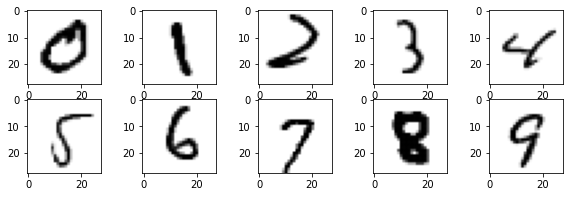

In [2]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
axes[0,0].imshow(mnist_data[1].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,1].imshow(mnist_data[7000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[0,2].imshow(mnist_data[14000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[0,3].imshow(mnist_data[21000].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,4].imshow(mnist_data[28000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[1,0].imshow(mnist_data[34000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[1,1].imshow(mnist_data[41000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[1,2].imshow(mnist_data[48000].reshape(28,28), cmap=plt.cm.gray_r) 
axes[1,3].imshow(mnist_data[54000].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,4].imshow(mnist_data[59000].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

In [3]:
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(mnist_data, mnist_target, test_size=10000, random_state=0)

print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
print(target_test.shape)


(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


In [5]:
target_train_true_with = [ (target_train == shape) for shape in range(0,10) ]


In [6]:
from sklearn.linear_model import SGDClassifier
classifiers= [ SGDClassifier(random_state=42) for i in range(0,10) ]
train_models = list(map(lambda classifier, target_train: classifier.fit(data_train,target_train.ravel()), classifiers, target_train_true_with))



[1.]
[array([False]), array([ True]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False]), array([False])]


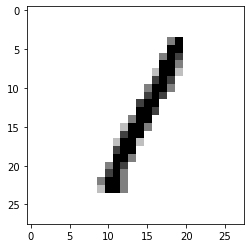

In [7]:
print(target_test[0])
plt.imshow(data_test[0].reshape(28,28), cmap=plt.cm.gray_r)
results=[ model.predict([data_test[0]]) for model in train_models]
print(results)

In [8]:
results=[[ model.predict([data_test_sample]) for model in train_models] for data_test_sample in data_test]
result_inv= [[],[],[],[],[],[],[],[],[],[]]

for value in results:
    for i in range(0,10):
        result_inv[i].append(value[i])

matrices = [ confusion_matrix(result_inv[index],(target_test==index)) for index in range(0,10)]
matrices

[array([[8961,   26],
        [ 103,  910]], dtype=int64),
 array([[8781,   72],
        [  56, 1091]], dtype=int64),
 array([[8522,   67],
        [ 496,  915]], dtype=int64),
 array([[8762,  137],
        [ 200,  901]], dtype=int64),
 array([[8938,  129],
        [ 114,  819]], dtype=int64),
 array([[8964,  238],
        [ 115,  683]], dtype=int64),
 array([[8845,   69],
        [ 142,  944]], dtype=int64),
 array([[8876,   94],
        [  95,  935]], dtype=int64),
 array([[8892,  468],
        [ 130,  510]], dtype=int64),
 array([[8716,  225],
        [ 292,  767]], dtype=int64)]

In [9]:
sgd= SGDClassifier(random_state=42)
sgd.fit(data_train,target_train.ravel())
  

SGDClassifier(random_state=42)

In [85]:
prediction=sgd.predict(data_test)
prediction

array([1., 4., 2., ..., 6., 3., 6.])

In [87]:
conf_mat=confusion_matrix(prediction,target_test)
conf_mat

array([[ 931,    3,   40,   26,   18,   60,   36,   17,   57,   20],
       [   0, 1097,    1,    2,    0,    2,    1,    3,   11,    3],
       [   0,    7,  786,    6,    2,    3,    4,    7,    2,    0],
       [   0,   16,   59,  940,    2,   46,    7,   38,   63,   41],
       [   2,    4,   30,   15,  908,   31,   13,   34,   68,  266],
       [   1,   10,    7,   23,    5,  745,   10,    6,   71,   22],
       [   1,    6,   21,    2,    6,   17,  938,    1,   15,    0],
       [   0,    0,    5,    0,    2,    1,    0,  839,    1,    8],
       [   0,   14,   32,   16,    1,   11,    4,    7,  682,    8],
       [   1,    6,    1,    8,    4,    5,    0,   77,    8,  624]],
      dtype=int64)

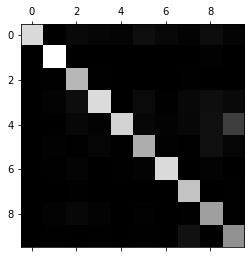

In [73]:
plt.matshow(conf_mat,cmap=plt.cm.gray)
plt.show()

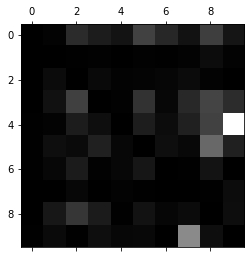

In [76]:
class_sum=conf_mat.sum(axis=1,keepdims=True)
norm_conf_mat=conf_mat/class_sum
np.fill_diagonal(norm_conf_mat,0)
plt.matshow(norm_conf_mat,cmap=plt.cm.gray)
plt.show()

[1, 19, 32, 53, 65, 135, 194, 210, 213, 222, 291, 312, 336, 375, 377, 396, 397, 403, 427, 455, 528, 546, 548, 560, 563, 571, 592, 593, 594, 603, 608, 623, 637, 694, 729, 779, 782, 807, 816, 883, 941, 1049, 1102, 1162, 1164, 1168, 1173, 1190, 1196, 1251, 1355, 1466, 1468, 1500, 1512, 1555, 1594, 1605, 1628, 1657, 1735, 1779, 1862, 1863, 1876, 1898, 1928, 1974, 2038, 2072, 2097, 2143, 2241, 2251, 2315, 2378, 2379, 2418, 2434, 2445, 2525, 2557, 2567, 2623, 2638, 2657, 2738, 2778, 2787, 2812, 2870, 2935, 2940, 3010, 3033, 3074, 3105, 3156, 3203, 3239, 3264, 3329, 3462, 3472, 3485, 3510, 3515, 3517, 3539, 3622, 3644, 3829, 3850, 3942, 3948, 4008, 4116, 4163, 4188, 4281, 4305, 4308, 4375, 4428, 4443, 4463, 4470, 4472, 4520, 4563, 4619, 4667, 4684, 4710, 4750, 4770, 4942, 4944, 4983, 5003, 5040, 5148, 5202, 5211, 5234, 5242, 5290, 5318, 5333, 5345, 5383, 5397, 5403, 5432, 5487, 5528, 5547, 5600, 5610, 5636, 5675, 5811, 5817, 5827, 5870, 5903, 5953, 6045, 6060, 6064, 6141, 6209, 6278, 6280, 62

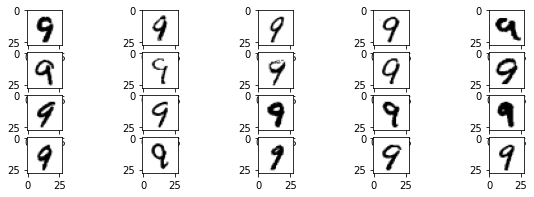

In [126]:
indexes =  [ index for (index,value) in enumerate(target_test) if (prediction[index] == 4) & (value == 9) ]
print(indexes)
false_4=[ sample for (index,sample) in enumerate(data_test) if index in indexes]

_, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 3))
axes[0,0].imshow(false_4[0].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,1].imshow(false_4[1].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,2].imshow(false_4[2].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,3].imshow(false_4[3].reshape(28,28), cmap=plt.cm.gray_r)
axes[0,4].imshow(false_4[4].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,0].imshow(false_4[5].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,1].imshow(false_4[6].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,2].imshow(false_4[7].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,3].imshow(false_4[8].reshape(28,28), cmap=plt.cm.gray_r)
axes[1,4].imshow(false_4[9].reshape(28,28), cmap=plt.cm.gray_r)
axes[2,0].imshow(false_4[10].reshape(28,28), cmap=plt.cm.gray_r)
axes[2,1].imshow(false_4[11].reshape(28,28), cmap=plt.cm.gray_r)
axes[2,2].imshow(false_4[12].reshape(28,28), cmap=plt.cm.gray_r)
axes[2,3].imshow(false_4[13].reshape(28,28), cmap=plt.cm.gray_r)
axes[2,4].imshow(false_4[14].reshape(28,28), cmap=plt.cm.gray_r)
axes[3,0].imshow(false_4[15].reshape(28,28), cmap=plt.cm.gray_r)
axes[3,1].imshow(false_4[16].reshape(28,28), cmap=plt.cm.gray_r)
axes[3,2].imshow(false_4[17].reshape(28,28), cmap=plt.cm.gray_r)
axes[3,3].imshow(false_4[18].reshape(28,28), cmap=plt.cm.gray_r)
axes[3,4].imshow(false_4[19].reshape(28,28), cmap=plt.cm.gray_r)

plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
etiquette_1=[ (target_train == 2 ) | ((target_train == 4 )) ]
etiquette_2=[ (target_train < 3 ) ]
target_multiclass=np.c_[etiquette_1,etiquette_2]
knc.fit(data_train,target_multiclass[0])

KNeighborsClassifier()

In [21]:
predictionKNC=knc.predict(data_test)


In [22]:
mult=[]
for (index,decisions) in enumerate(predictionKNC):
    count=sum([ 1 for element in decisions if element == True])
    if count > 1:
        mult.append(index)
print(mult)

[2, 3, 14, 16, 25, 34, 38, 42, 64, 74, 75, 77, 90, 101, 121, 123, 134, 136, 147, 169, 185, 193, 200, 206, 207, 209, 224, 232, 242, 246, 268, 286, 290, 303, 323, 331, 342, 345, 359, 366, 380, 384, 389, 395, 401, 412, 449, 451, 454, 461, 462, 480, 516, 520, 535, 536, 540, 547, 549, 550, 551, 579, 589, 597, 602, 605, 609, 612, 615, 624, 632, 647, 655, 660, 669, 677, 689, 720, 726, 740, 742, 756, 758, 766, 772, 785, 786, 796, 801, 818, 830, 840, 865, 869, 870, 892, 897, 905, 919, 938, 939, 942, 961, 974, 980, 1015, 1031, 1034, 1045, 1046, 1048, 1053, 1056, 1062, 1064, 1067, 1077, 1081, 1083, 1104, 1117, 1120, 1122, 1130, 1149, 1151, 1155, 1163, 1191, 1206, 1209, 1213, 1215, 1226, 1250, 1257, 1261, 1273, 1278, 1281, 1285, 1296, 1298, 1301, 1313, 1343, 1359, 1369, 1390, 1394, 1408, 1409, 1416, 1432, 1449, 1462, 1474, 1493, 1517, 1523, 1526, 1538, 1539, 1543, 1545, 1547, 1554, 1571, 1572, 1581, 1625, 1638, 1641, 1678, 1679, 1689, 1694, 1697, 1702, 1705, 1709, 1738, 1740, 1745, 1748, 1749, 175

In [23]:

predictionKNC


array([[False,  True],
       [False, False],
       [ True,  True],
       ...,
       [False, False],
       [False, False],
       [False, False]])